In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
model = 'SupervisedModelTraining____mars_gym_model_b____cf9405841a_954c5eb408'
path = '/home/marlesson/workspace/booking_challenge/output/evaluation/EvaluationTask/results/'+model

In [8]:
df_city = pd.read_csv(path+'/dataset.csv')[['last_city_id', 'last_hotel_country']].drop_duplicates()
df_city.columns = ['city_id', 'hotel_country']
df_city['city_id'] = df_city['city_id'].astype(str)
df_city.head()

,city_id,hotel_country
0,1910,Patusan
1,25025,Norland
2,46675,Kumbolaland
3,6582,Sokovia
4,60143,Patusan


In [9]:
df_report = pd.read_csv(path+'/classification_report.csv')
df_report.columns = ['city_id','precision','recall','f1-score','support']

df_report = df_report.merge(df_city)
df_report

,city_id,precision,recall,f1-score,support,hotel_country
0,47499,0.342205,0.789474,0.477454,114.0,Kangan
1,19771,0.324503,0.690141,0.441441,71.0,Patusan
2,7410,0.463918,0.661765,0.545455,68.0,Kasnia
3,17013,0.411765,0.617647,0.494118,68.0,Borginia
4,60143,0.484848,0.761905,0.592593,63.0,Patusan
...,...,...,...,...,...,...
1097,33767,0.000000,0.000000,0.000000,1.0,Kangan
1098,35014,0.000000,0.000000,0.000000,1.0,San Theodoros
1099,33627,0.000000,0.000000,0.000000,1.0,Holy Britannian Empire
1100,35549,0.000000,0.000000,0.000000,1.0,Drusselstein


In [78]:
df_report_by_coutry = df_report.groupby('hotel_country').agg({
                            'precision': 'mean', 
                            'recall': 'mean', 
                            'f1-score': 'mean',
                            'support': 'sum'})\
                        .sort_values('support', ascending=False )
df_report_by_coutry.head(10)

,precision,recall,f1-score,support
hotel_country,,,,
Patusan,0.046764,0.052829,0.046173,389.0
Cobra Island,0.020560,0.048840,0.027153,345.0
Borginia,0.077291,0.099342,0.085470,335.0
Kangan,0.015173,0.023529,0.016415,323.0
Kasnia,0.065799,0.091028,0.066668,255.0
Rolisica,0.115734,0.167059,0.126751,202.0
Glubbdubdrib,0.056467,0.063152,0.052729,177.0
Fook Island,0.093080,0.131656,0.101730,140.0
Yerba,0.038249,0.061358,0.044422,112.0


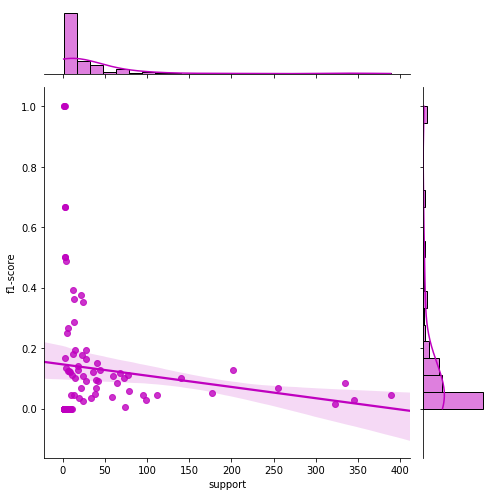

In [11]:
g = sns.jointplot(x="support", y="f1-score", data=df_report_by_coutry,
                  kind="reg", truncate=False,
                  color="m", height=7)

In [79]:
#df_report_by_coutry.sort_values('f1-score', ascending=False )

In [80]:
df_metric = pd.read_csv(path+'/metric.csv')
df_metric = df_metric.rename(columns={'predict': 'city_id'})
df_metric['city_id'] = df_metric['city_id'].astype(str)

#df_report.columns = ['city_id','precision','recall','f1-score','support']
df_metric = df_metric.merge(df_city)
df_metric = df_metric[['utrip_id', 'last_city_id', 'last_hotel_country', 'city_id', 'hotel_country']]
df_metric
#df_report

,utrip_id,last_city_id,last_hotel_country,city_id,hotel_country
0,1000682_1,1910,Patusan,1910,Patusan
1,1384326_2,1910,Patusan,1910,Patusan
2,1967839_2,60143,Patusan,1910,Patusan
3,2068527_2,54178,Patusan,1910,Patusan
4,2608770_2,60143,Patusan,1910,Patusan
...,...,...,...,...,...
3699,682415_1,35555,Borginia,65986,Borginia
3700,81532_1,47976,Holy Britannian Empire,15990,Holy Britannian Empire
3701,911486_1,22338,Yerba,40453,Yerba
3702,91445_6,37780,Mundania,1114,Mundania


In [74]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, target_names = []):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=90)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [75]:
# Compute confusion matrix
df_conf_metrix.head()

,utrip_id,last_city_id,last_hotel_country,city_id,hotel_country
0,1000682_1,1910,Patusan,1910,Patusan
1,1384326_2,1910,Patusan,1910,Patusan
2,1967839_2,60143,Patusan,1910,Patusan
3,2068527_2,54178,Patusan,1910,Patusan
4,2608770_2,60143,Patusan,1910,Patusan


/home/marlesson/anaconda3/envs/booking_challenge/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Confusion matrix, without normalization


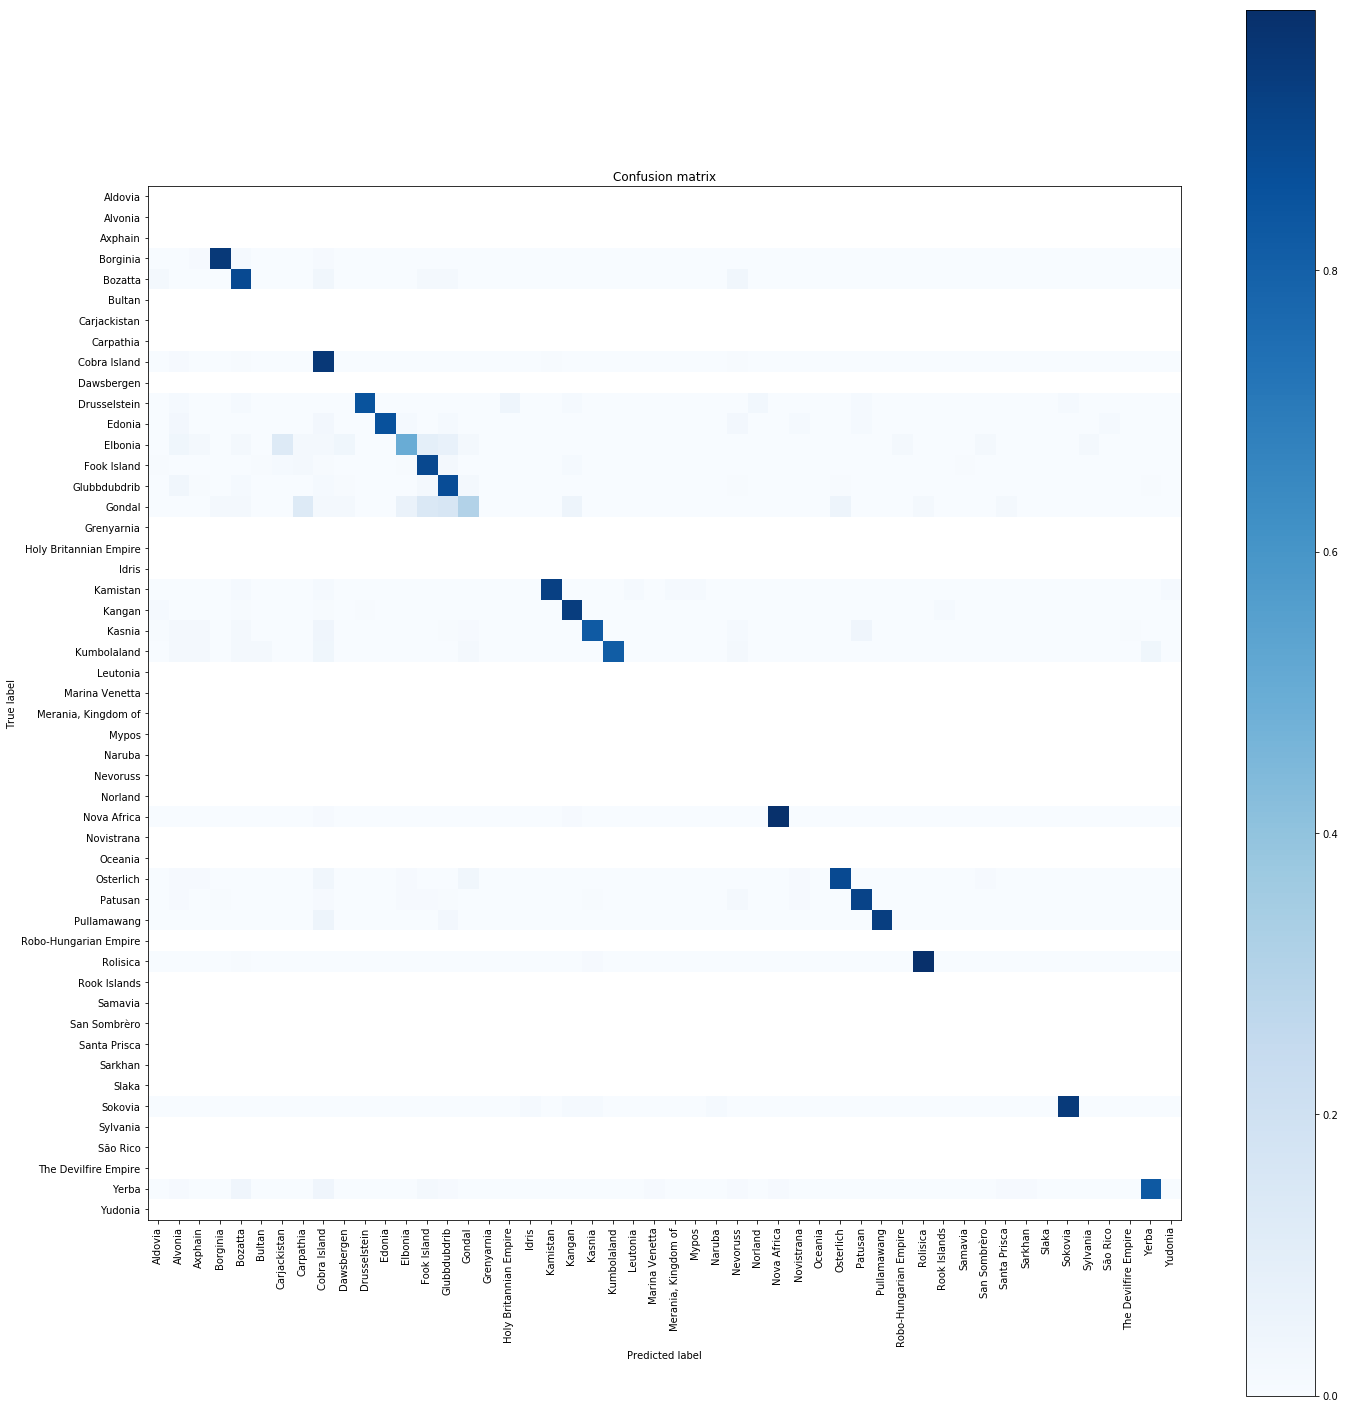

In [85]:
# Filter
top_coutry_sup = list(df_report_by_coutry.index)[:20]
df_conf_metrix = df_metric[df_metric['last_hotel_country'].isin(top_coutry_sup)]
y_test = df_conf_metrix['last_hotel_country']
y_pred = df_conf_metrix['hotel_country']


# Print
np.set_printoptions(precision=2)
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
target_names  = np.unique(list(y_test.values) + list(y_pred.values))

print('Confusion matrix, without normalization')
plt.figure(figsize=(20, 20))
plot_confusion_matrix(cm_normalized, target_names=target_names)